## Risikoanalyse in Bezug auf Terroranschläge für international tätige Reiseunternehmen

## Inhaltsverzeichnis

[1. Einleitung](#1-einleitung)  
[2. Explorative Datenanalyse](#2-explorative-datenanalyse)  
[3. Unifying & Transformation](#3-unifying--transformation)  
[4. Data Cleansing](#4-data-cleansing)  
[5. Analysis & Validation](#5-analysis--validation)  
[6. Feature Selection & Engineering](#6-feature-selection--engineering)  
[7. Anwendung in Machine Learning](#7-anwendung-in-machine-learning)  
[8. Anwendung von XAI - Techniken](#8-anwendung-von-xai---techniken)  
[9. Fazit](#9-fazit)  
[10. Quellenverzeichnis](#10-quellenverzeichnis)

## 1. Einleitung

<u>Projektmitglieder:</u>

Elias Wolfsberger (wolfseli@students.zhaw.ch), Oliver Brennwald (brennoli@students.zhaw.ch), Florian Rieser (rieseflo@students.zhaw.ch)<br><br>

<u>Datenquelle:</u>

Global terrorism database (START, 2022)<br><br>

<u>Problem- & Fragestellung:</u>

Angesichts der wachsenden globalen Unsicherheiten und der Bedrohung durch Terrorismus sehen sich Reisebüros mit der Aufgabe konfrontiert, ihre Kunden über potenzielle Risiken zu informieren. Terroranschläge können nicht nur die Sicherheit von Reisen beeinträchtigen, sondern auch das Vertrauen der Reisenden in bestimmte Reiseziele untergraben. Vor diesem Hintergrund stellt sich die zentrale Frage: Wie können wir mithilfe der Global Terrorism Database (GTD) und moderner Machine-Learning-Technologien ein Prognosemodell entwickeln, das mögliche terroristische Angriffe in verschiedenen Regionen vorhersagt und den Reisebüros hilft, informierte Entscheidungen zu treffen, um ihre Kunden besser zu schützen?<br><br>

<u>Zielsetzung:</u>

Das Hauptziel dieses Projekts besteht darin, ein präzises und effektives Prognosemodell zu entwickeln, das auf der Analyse von Daten aus der Global Terrorism Database basiert. Dieses Modell wird darauf abzielen, Muster und Trends in Bezug auf terroristische Aktivitäten zu identifizieren und Vorhersagen über zukünftige Angriffe zu treffen. Durch die Bereitstellung dieser Informationen wollen wir Reisebüros einen signifikanten Mehrwert bieten, indem sie proaktive Massnahmen zur Risikominderung ergreifen können. Das letztliche Ziel besteht darin, die Sicherheit und das Vertrauen der Reisenden zu fördern, indem eine fundierte Entscheidungsgrundlage geschaffen wird.<br><br>

<u>Vorgehen & Methoden:</u>

1. Explorative Datenanalyse 

2. Unifying & Transformation

3. Data Cleansing

4. Analysis & Validation

5. Feature Selection & Engineering

6. Anwendung in Machine Learning

7. Anwendung von XAI - Techniken

## 2. Explorative Datenanalyse

Zuerst werden die benötigten Bibliotheken importiert.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Nun wird die xlsx-Datei mit den Daten in einen Pandas Data-Frame geladen.   
Ausserdem verschaffen wir uns einen Überblick über die Daten, indem wir uns mit dem Attribut `v.shape` die Anzahl der Spalten und Zeilen des DataFrames anzeigen lassen.   
Um einen Einblick in die Daten zu bekommen, lassen wir uns zusätzlich mit der Funktion `.head()` die ersten 5 Zeilen des DataFrames anzeigen.

In [3]:
# Daten laden
df = pd.read_excel('data/globalterrorismdb_0522dist.xlsx')

In [4]:
df.to_csv("data/globalterrorismdb_0522dist.csv", index=False)

In [7]:
df = pd.read_csv("data/globalterrorismdb_0522dist.csv")

/tmp/ipykernel_39154/1433674959.py:1: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/globalterrorismdb_0522dist.csv")


In [8]:
# Anzahl der Zeilen und Spalten anzeigen
print(df.shape)

print("--------------------")

# Erste 5 Zeilen anzeigen
df.head()

(209706, 135)
--------------------


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Der Datensatz besteht aus 135 Spalten und 209'706 Zeilen.  
Es werden aber noch nicht alle Spalten angezeigt. Dies wird mit `display.max.columns` geändert.   
Danach lassen wir uns diesmal die letzten 5 Zeilen ausgeben, um zu prüfen, ob nun alle Spalten angezeigt werden.

In [4]:
# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)

# letzte 5 Zeilen anzeigen
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
209701,202012310015,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,15.305307,43.019490,2.0,0,NaN,12/31/2020: Assailants fired mortar shells tar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,NaN,0.0,0.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Houses and buildings damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,13.931337,43.478924,2.0,0,The incident occurred in the Hays district.,12/31/2020: Assailants attempted to plant expl...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,228.0,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houthi extremists (Ansar Allah),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,6.0,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,Western Europe,Lower Saxony,Leipzig,51.342239,12.374772,1.0,0,NaN,12/31/2020: Assailants set fire to German Army...,1,1,0,1,1.0,Insurgency/Guerilla Action,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,35.0,Military Transportation/Vehicle (excluding con...,German Army,Wolf-Class Vehicles,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left-wing extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,7.0,"Posted to website, blog, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Military vehicles damaged,0.0,NaN,NaN,NaN,NaN,Na

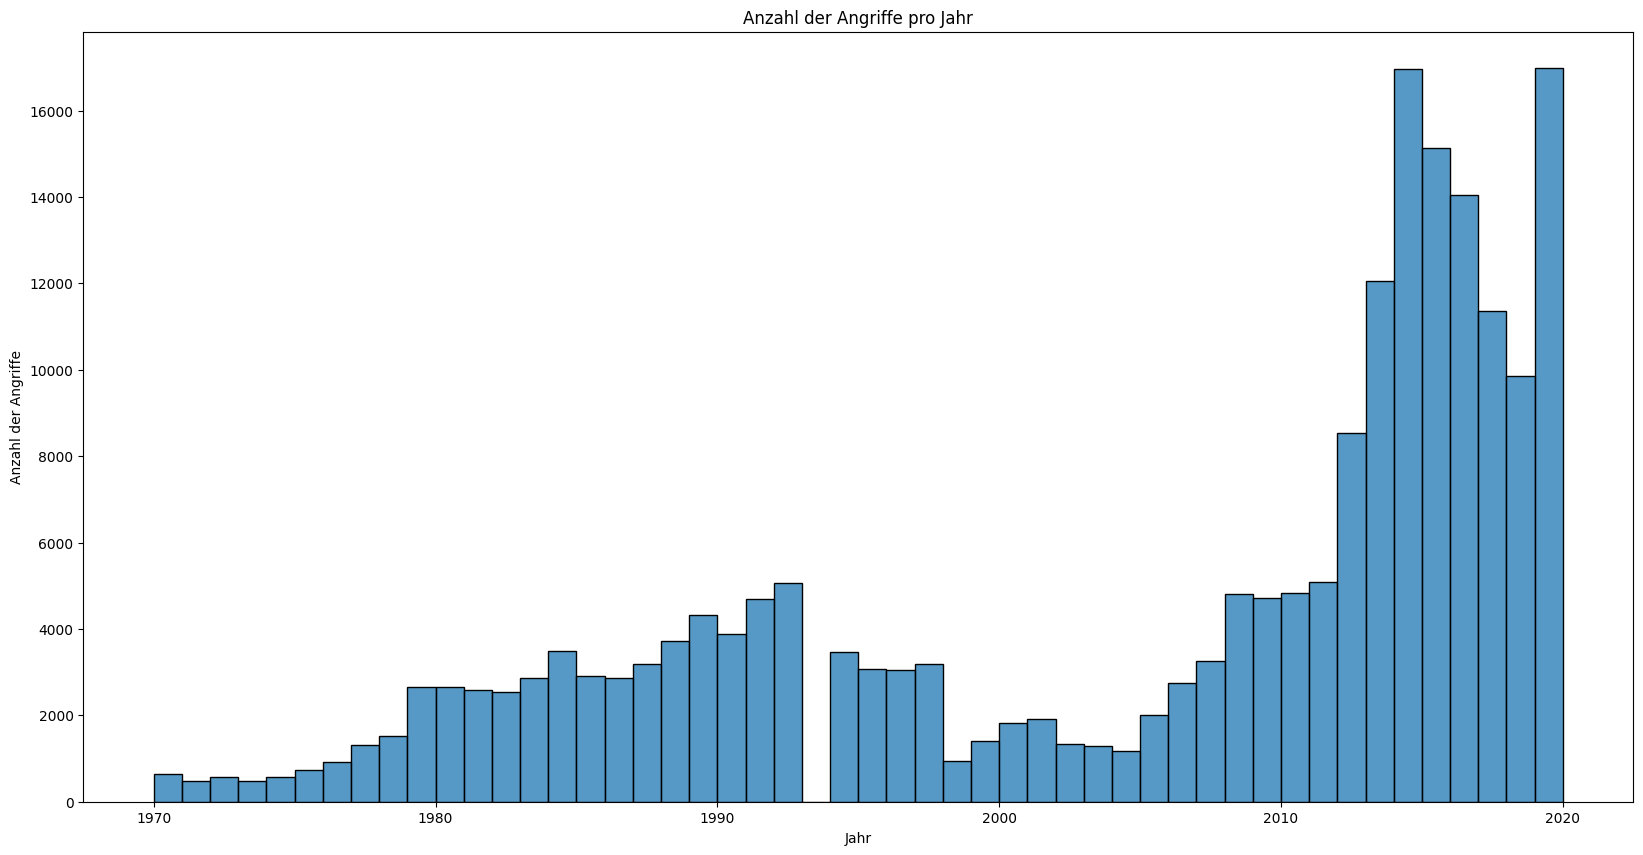

In [9]:
# Histogramm der Anzahl der Angriffe pro Jahr
plt.figure(figsize=(20,10))
sns.histplot(df['iyear'], bins=50, kde=False)
plt.title('Anzahl der Angriffe pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Angriffe')
plt.show()

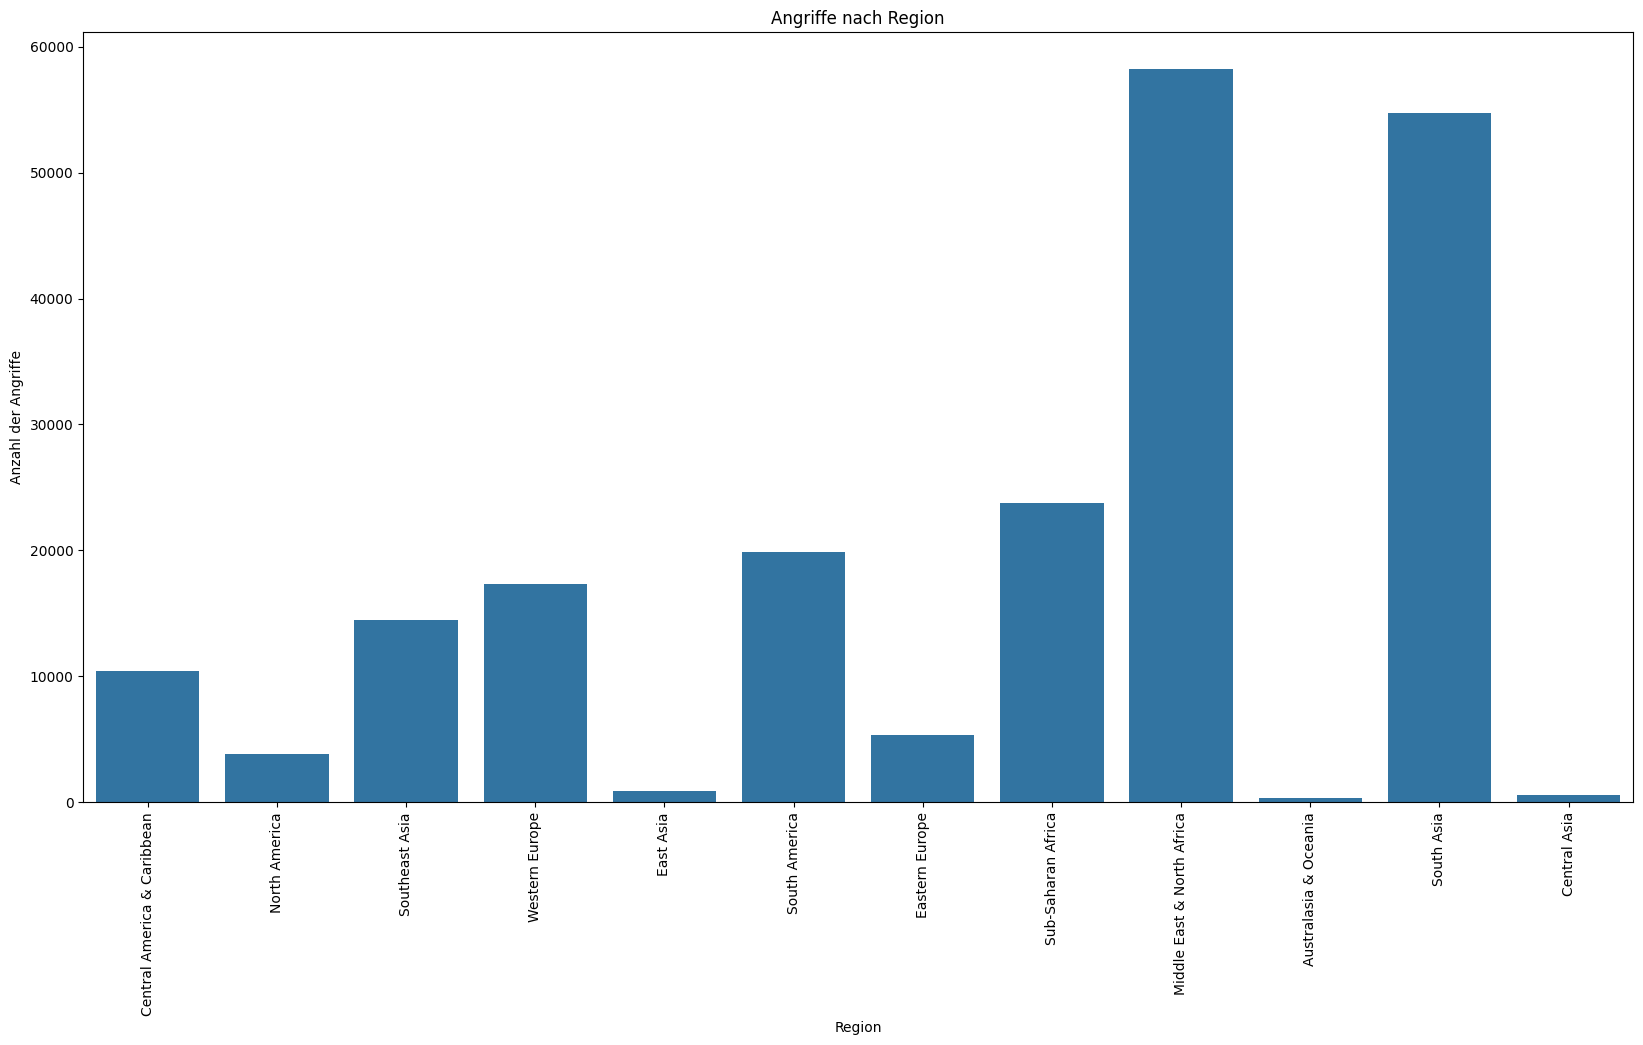

In [6]:
# Angriffe nach Region
plt.figure(figsize=(20,10))
sns.countplot(x='region_txt', data=df)
plt.title('Angriffe nach Region')   
plt.xlabel('Region')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


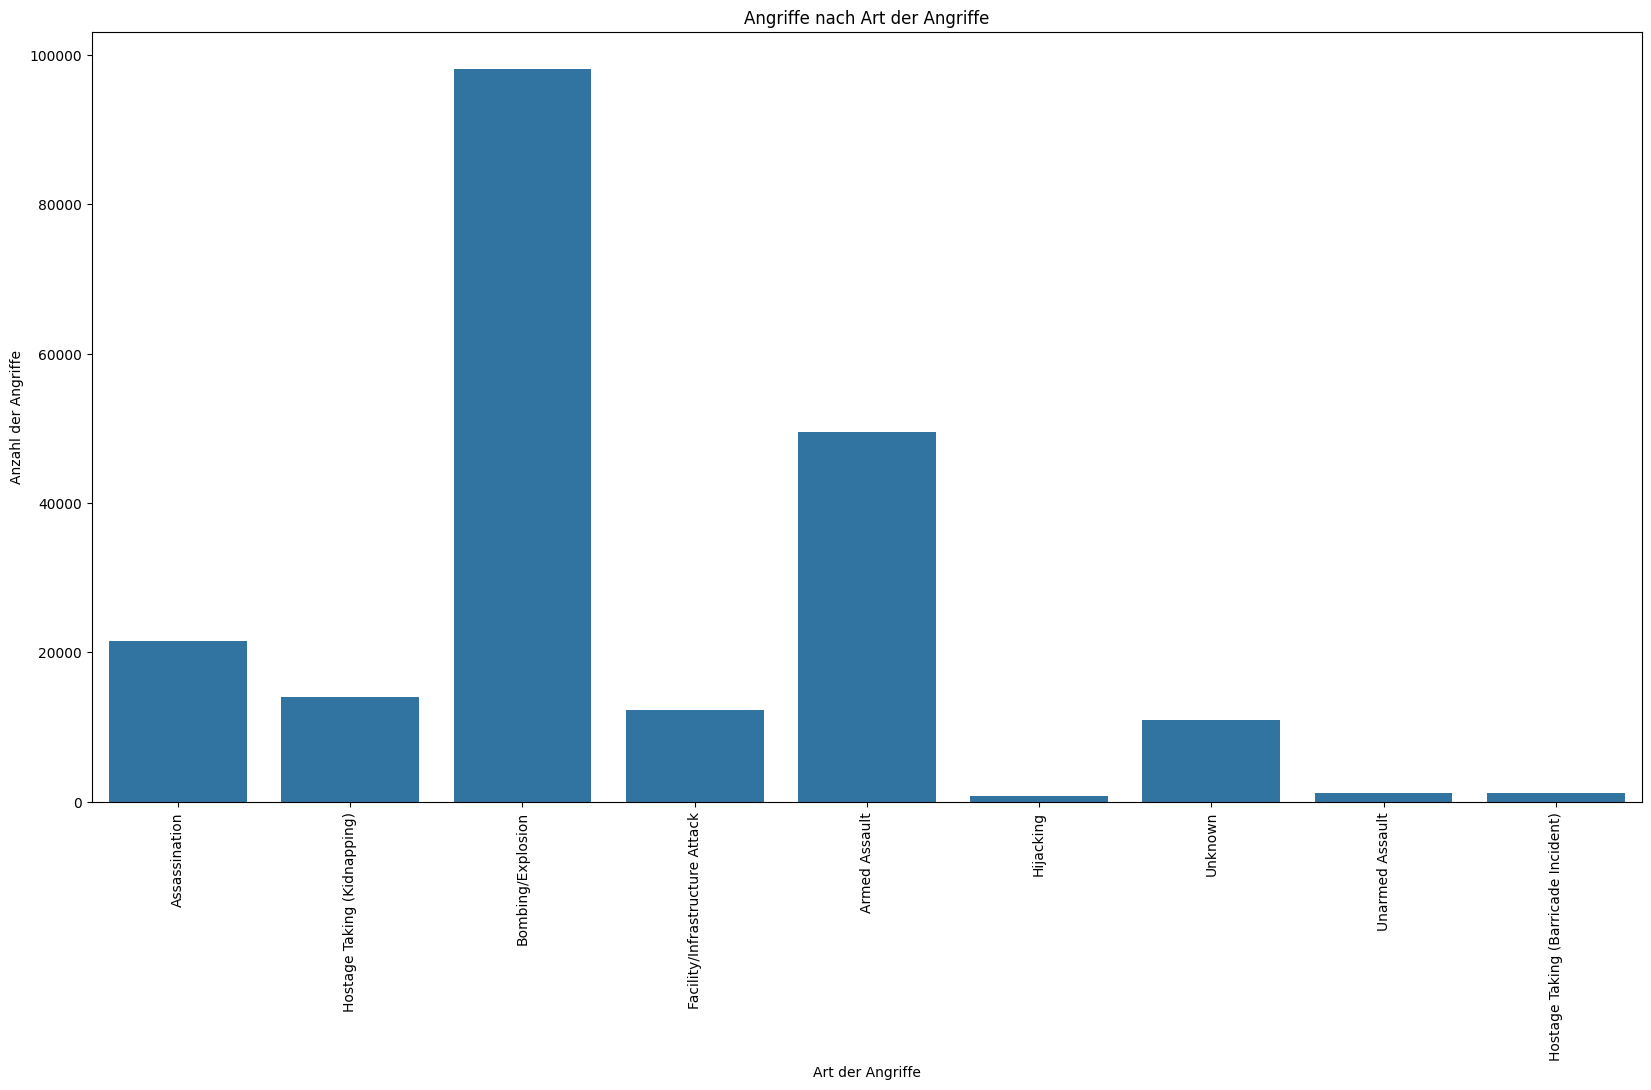

In [7]:
# Angriffe nach Art der Angriffe
plt.figure(figsize=(20,10))
sns.countplot(x='attacktype1_txt', data=df)
plt.title('Angriffe nach Art der Angriffe')
plt.xlabel('Art der Angriffe')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

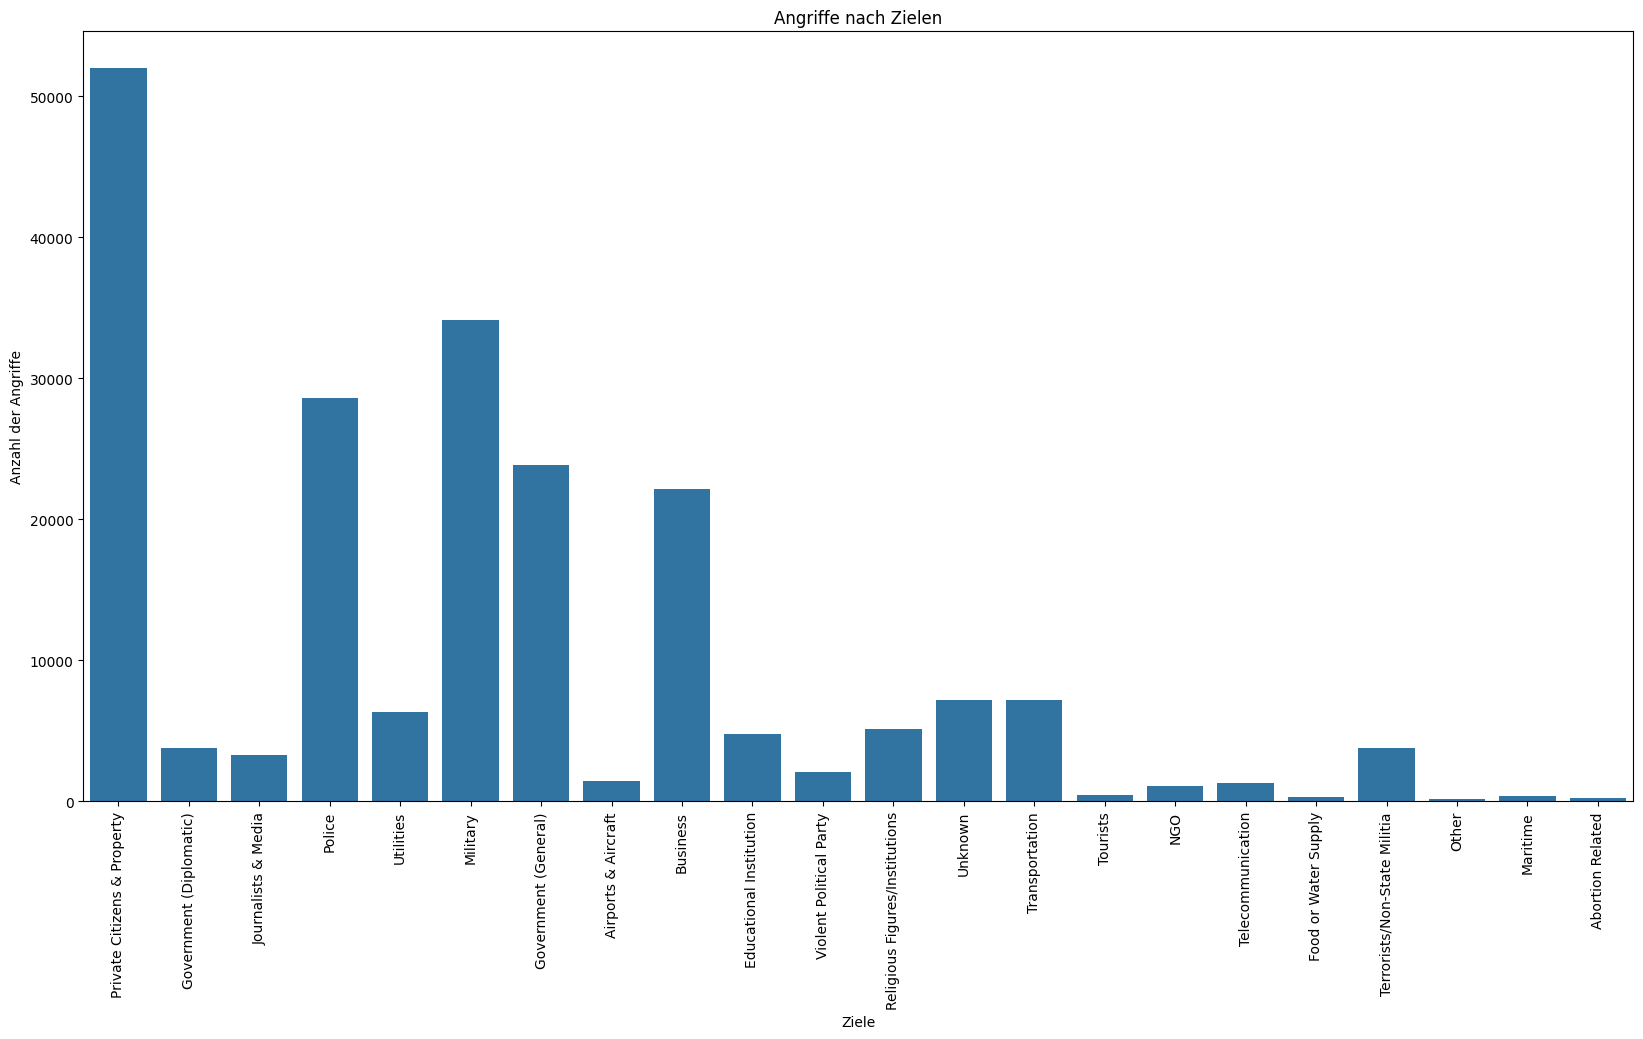

In [8]:
# Angriffe nach Zielen
plt.figure(figsize=(20,10))
sns.countplot(x='targtype1_txt', data=df)
plt.title('Angriffe nach Zielen')
plt.xlabel('Ziele')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()


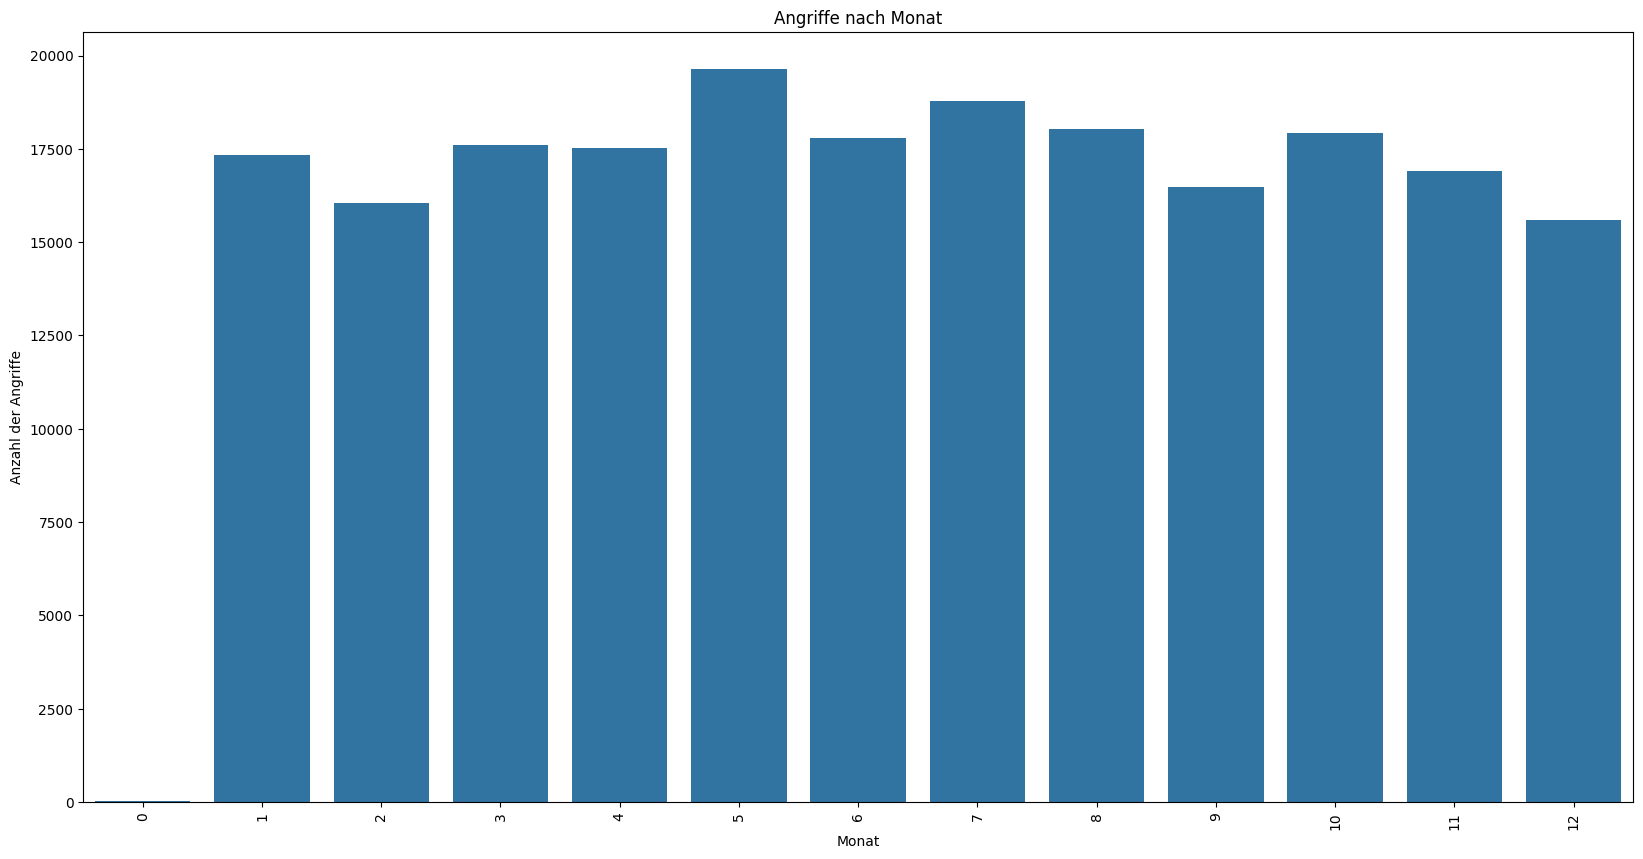

In [9]:
# Angriffe nach Monat
plt.figure(figsize=(20,10))
sns.countplot(x='imonth', data=df)
plt.title('Angriffe nach Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Angriffe')
plt.xticks(rotation=90)
plt.show()

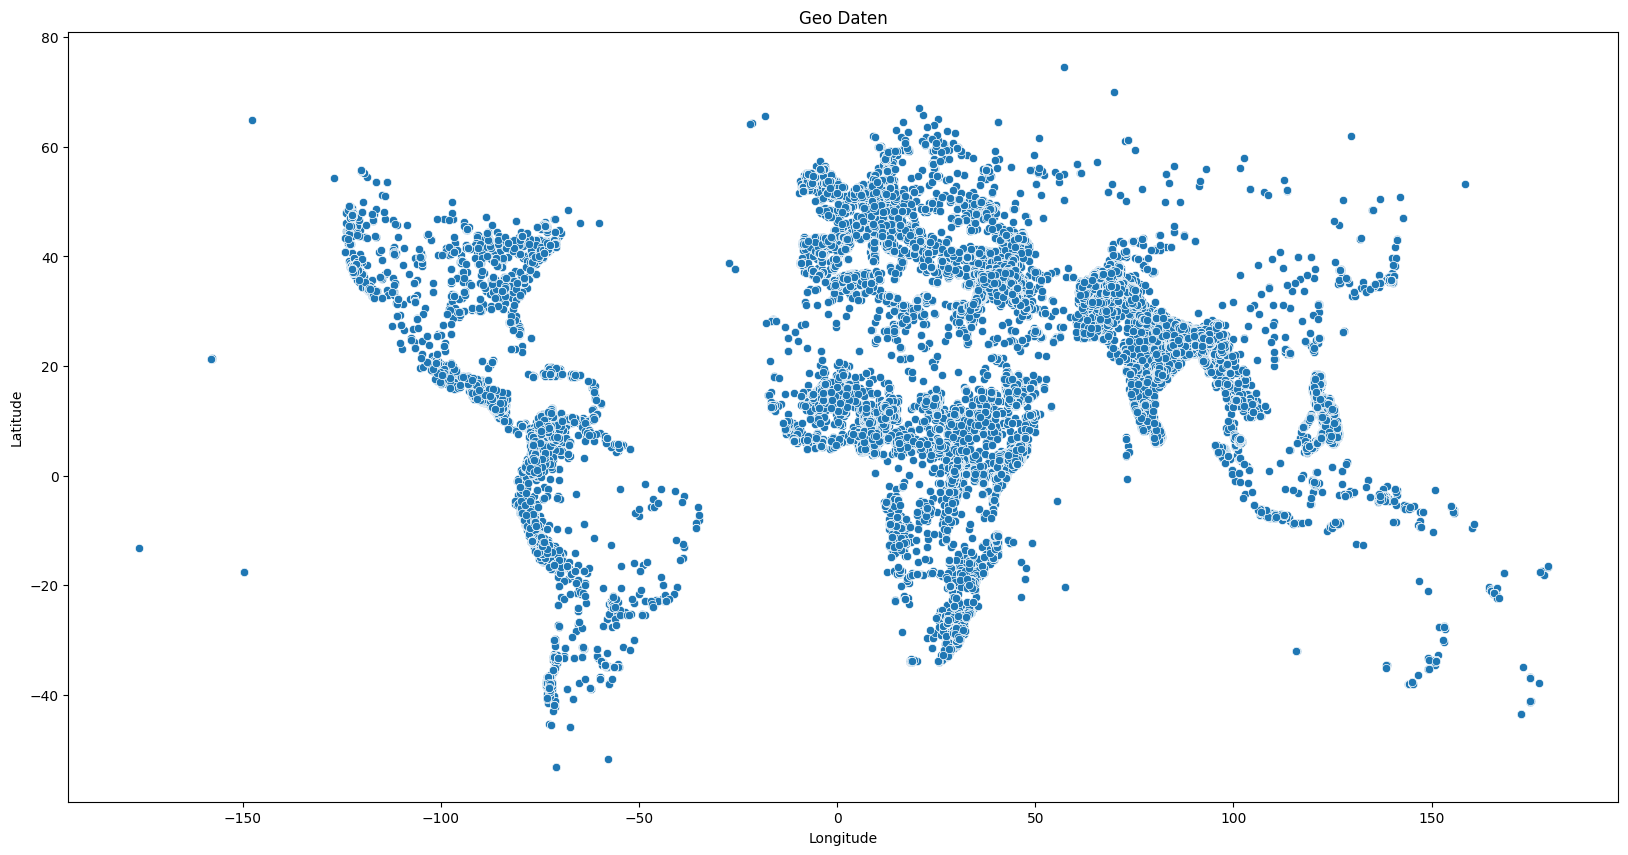

In [10]:
# Angriffe nach Lokation (Koordinaten)
plt.figure(figsize=(20,10))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('Geo Daten')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

2.4310296735453574


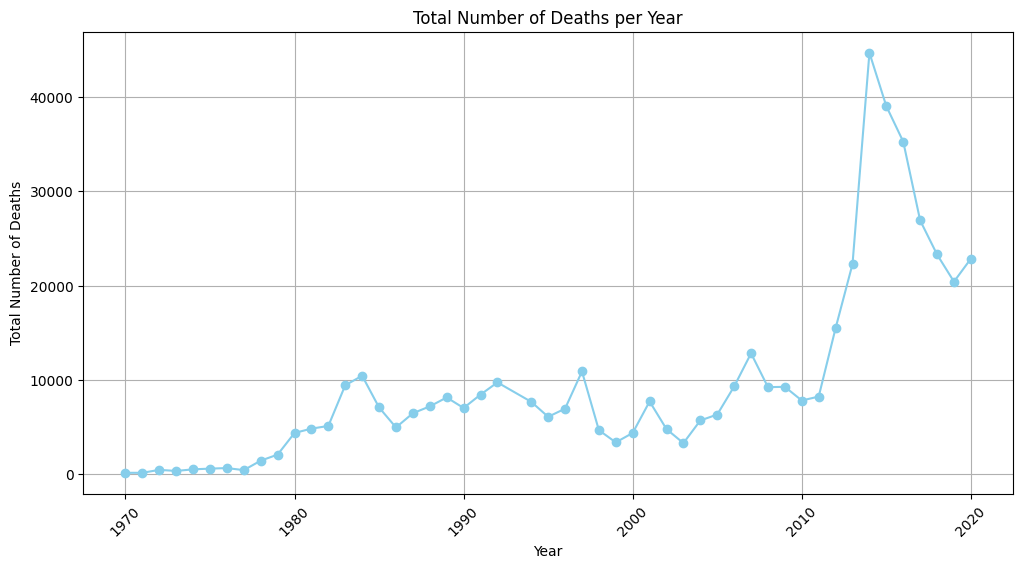

In [11]:
# Durchschittliche Anzahl der Todesopfer pro Angriff
print(df['nkill'].mean())

# Aggregieren der totalen Anzahl der Todesopfer pro Jahr
total_deaths_per_year = df.groupby('iyear')['nkill'].sum().reset_index()

# Visualisierung als Liniendiagramm
plt.figure(figsize=(12, 6))
plt.plot(total_deaths_per_year['iyear'], total_deaths_per_year['nkill'], marker='o', color='skyblue')
plt.title('Total Number of Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.grid()
plt.show()

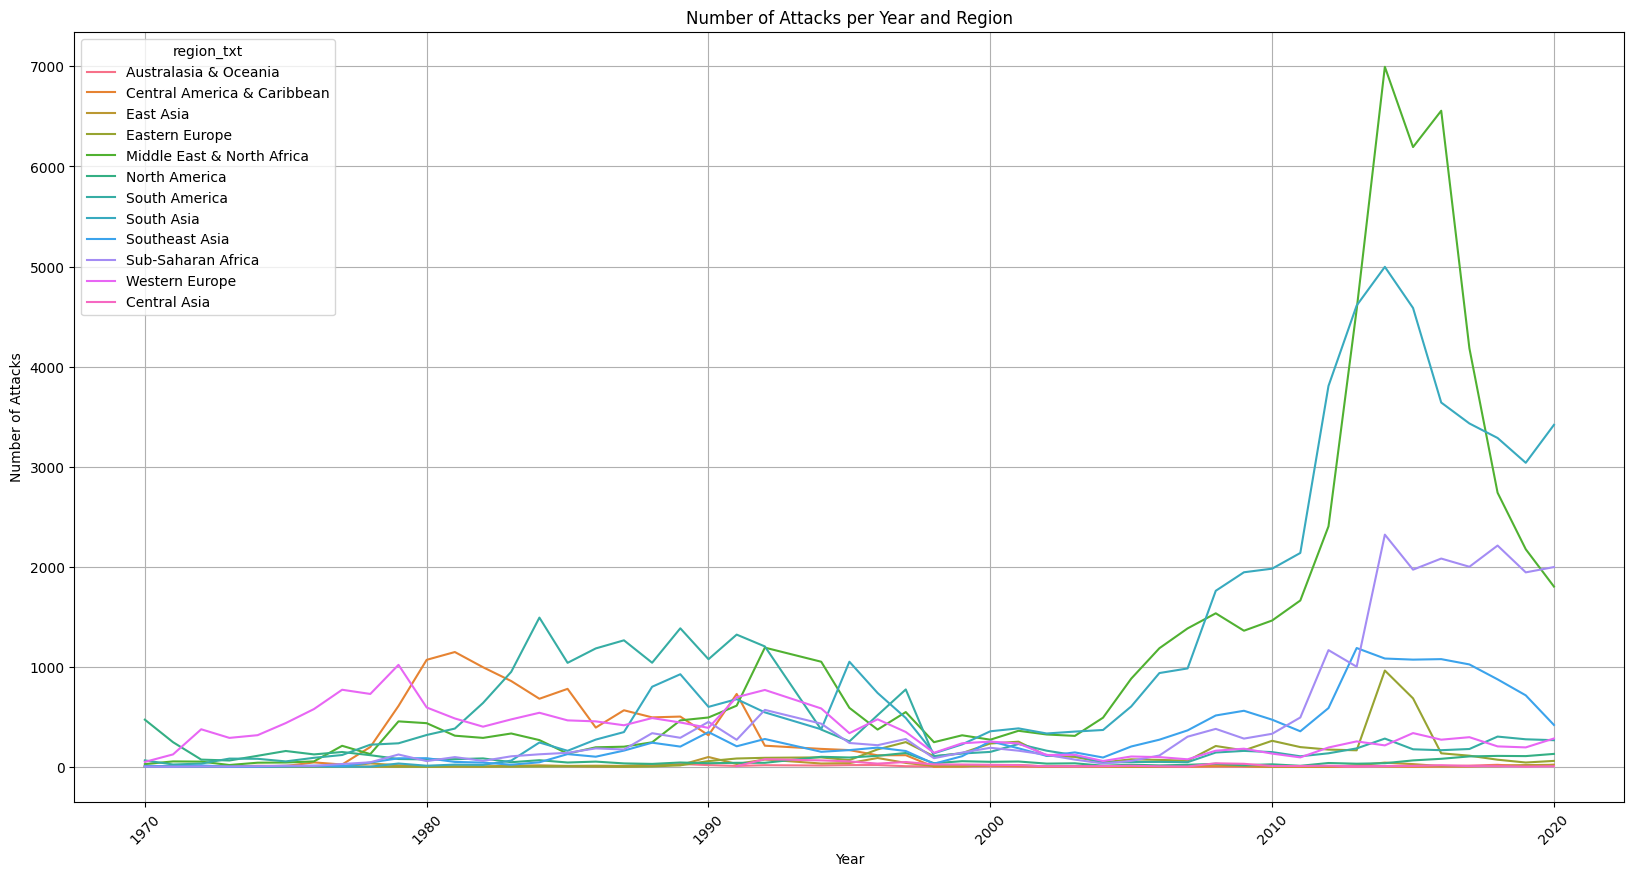

In [12]:
# Entwicklung der Anzahl der Angriffe pro Jahr und Region
attacks_per_year_region = df.groupby(['iyear', 'region_txt']).size().reset_index(name='attack_count')

plt.figure(figsize=(20, 10))
sns.lineplot(x='iyear', y='attack_count', hue='region_txt', data=attacks_per_year_region)
plt.title('Number of Attacks per Year and Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid()
plt.show()

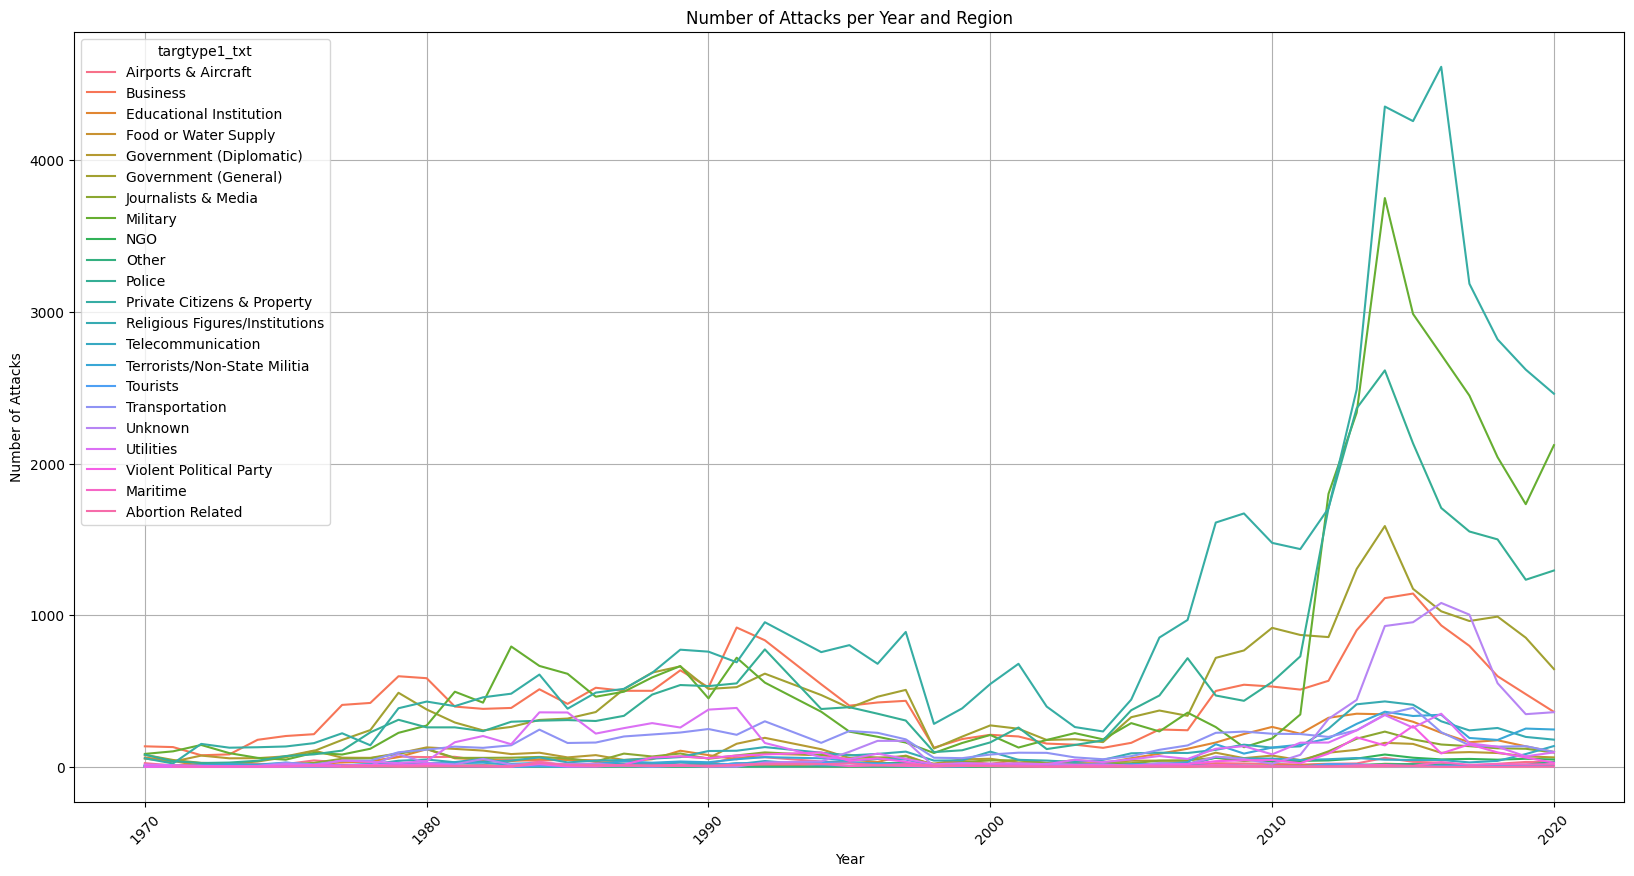

In [13]:
# Entwicklung der Anzahl der Angriffe pro Jahr und Region
attacks_per_year_targtype = df.groupby(['iyear', 'targtype1_txt']).size().reset_index(name='attack_count')

plt.figure(figsize=(20, 10))
sns.lineplot(x='iyear', y='attack_count', hue='targtype1_txt', data=attacks_per_year_targtype)
plt.title('Number of Attacks per Year and Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [10]:
# Hypothesentests
# Die Angriffsart ist unabhaengig von der Region
# Null Hypothese: Die Angriffsart ist unabhaengig von der Region
# Alternative Hypothese: Die Angriffsart ist abhaengig von der Region

from scipy.stats import chi2_contingency

# Kreuztabelle erstellen
cross_table = pd.crosstab(df['region_txt'], df['attacktype1_txt'])

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(cross_table)

print('Chi-Quadrat-Statistik:', chi2)
print('p-Wert:', p)
print('Freiheitsgrade:', dof)
print('Erwartete Werte:', expected)

# Interpretation des p-Werts
if p < 0.05:
    print("Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'attacktype1' und 'region' (H₀ ablehnen).")
else:
    print("Ergebnis: Kein signifikanter Zusammenhang zwischen 'attacktype1' und 'region' (H₀ nicht ablehnen).")

Chi-Quadrat-Statistik: 27464.870792487032
p-Wert: 0.0
Freiheitsgrade: 88
Erwartete Werte: [[7.67966820e+01 3.33808999e+01 1.52124164e+02 1.91011464e+01
  1.17628966e+00 1.79155580e+00 2.17667830e+01 1.90469038e+00
  1.69577885e+01]
 [2.45418566e+03 1.06675085e+03 4.86142022e+03 6.10413865e+02
  3.75905983e+01 5.72526108e+01 6.95599411e+02 6.08680438e+01
  5.41918743e+02]
 [1.37052540e+02 5.95720676e+01 2.71483124e+02 3.40881997e+01
  2.09922463e+00 3.19723804e+00 3.88453359e+01 3.39913975e+00
  3.02631303e+01]
 [2.00143968e+02 8.69957607e+01 3.96458976e+02 4.97805261e+01
  3.06559183e+00 4.66907003e+00 5.67275853e+01 4.96391615e+00
  4.41946058e+01]
 [1.25852040e+03 5.47035917e+02 2.49296400e+03 3.13023709e+02
  1.92766731e+01 2.93594652e+01 3.56707343e+02 3.12134798e+01
  2.77899021e+02]
 [1.37648010e+04 5.98308979e+03 2.72662671e+04 3.42363070e+03
  2.10834540e+02 3.21112949e+02 3.90141121e+03 3.41390842e+02
  3.03946184e+03]
 [9.09036418e+02 3.95127145e+02 1.80068203e+03 2.26098800e

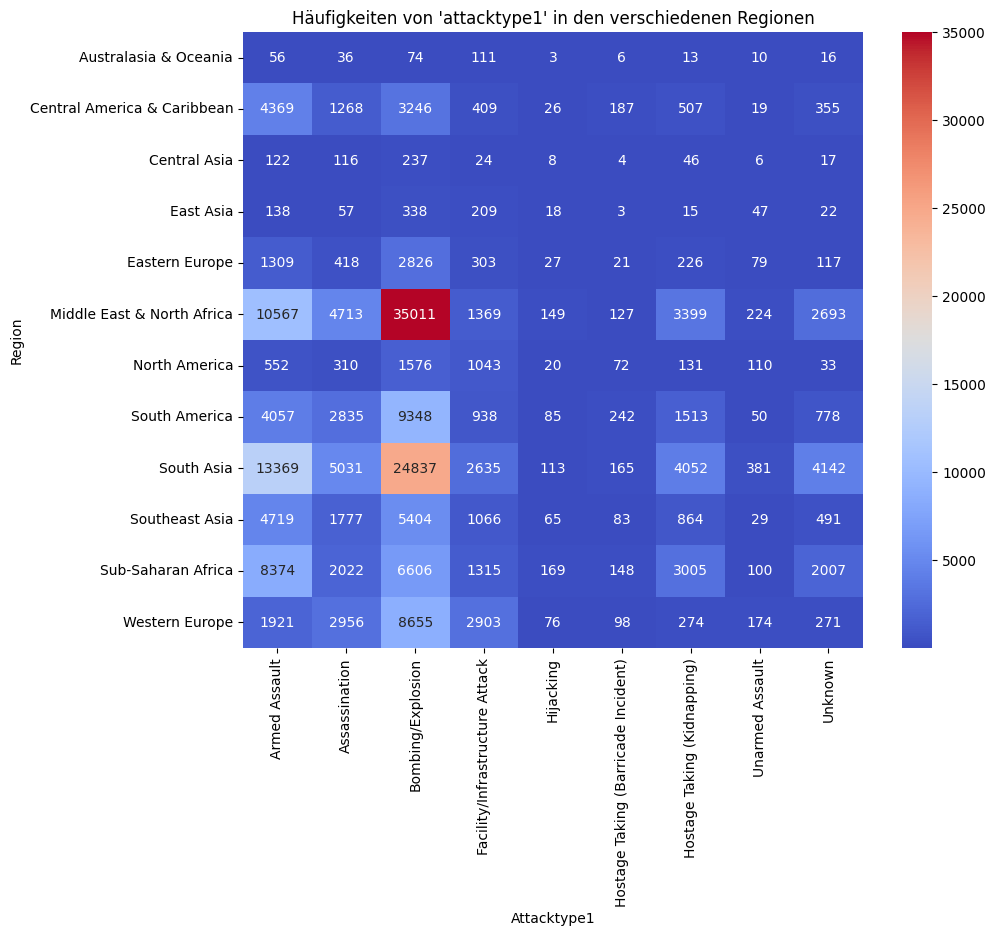

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Häufigkeiten von 'attacktype1' in den verschiedenen Regionen")
plt.xlabel("Attacktype1")
plt.ylabel("Region")
plt.show()


Chi-Quadrat-Statistik: 72788.90165113777
p-Wert: 0.0
Freiheitsgrade: 1624
Erwartete Werte: [[4.47074838e+03 1.94328193e+03 8.85596673e+03 ... 1.26716165e+03
  1.10882283e+02 9.87204181e+02]
 [1.93763936e+01 8.42225783e+00 3.83820968e+01 ... 5.49192679e+00
  4.80568033e-01 4.27858049e+00]
 [6.50526971e+02 2.82761900e+02 1.28860869e+03 ... 1.84381396e+02
  1.61341926e+01 1.43645513e+02]
 ...
 [1.18148742e+01 5.13552307e+00 2.34037176e+01 ... 3.34873585e+00
  2.93029289e-01 2.60889054e+00]
 [1.46504440e+01 6.36804860e+00 2.90206098e+01 ... 4.15243245e+00
  3.63356318e-01 3.23502427e+00]
 [2.50475332e+01 1.08873089e+01 4.96158813e+01 ... 7.09932000e+00
  6.21222092e-01 5.53084795e+00]]
Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'attacktype1' und 'country' (H₀ ablehnen).


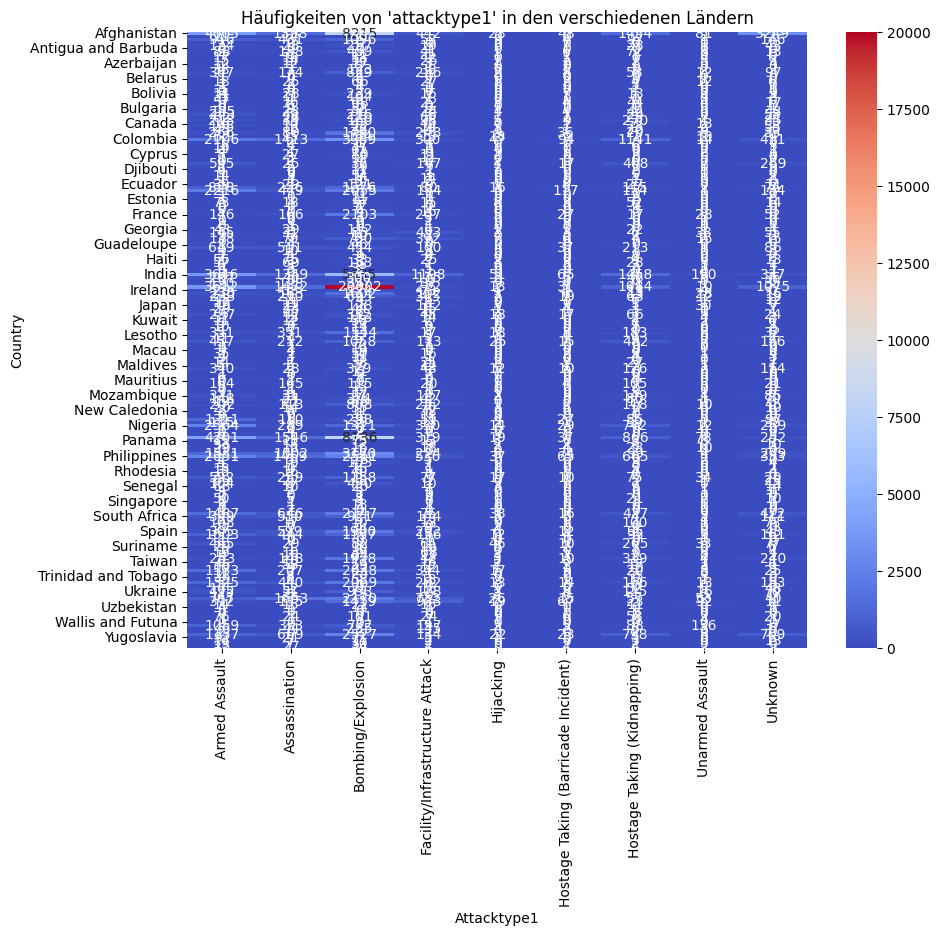

In [12]:
# Hypothesentests
# Die Angriffsart ist unabhaengig vom Land
# Null Hypothese: Die Angriffsart ist unabhaengig vom Land
# Alternative Hypothese: Die Angriffsart ist abhaengig vom Land

# Kreuztabelle erstellen
cross_table = pd.crosstab(df['country_txt'], df['attacktype1_txt'])

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(cross_table)

print('Chi-Quadrat-Statistik:', chi2)
print('p-Wert:', p)
print('Freiheitsgrade:', dof)
print('Erwartete Werte:', expected)

# Interpretation des p-Werts
if p < 0.05:
    print("Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'attacktype1' und 'country' (H₀ ablehnen).")
else:
    print("Ergebnis: Kein signifikanter Zusammenhang zwischen 'attacktype1' und 'country' (H₀ nicht ablehnen).")

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Häufigkeiten von 'attacktype1' in den verschiedenen Ländern")
plt.xlabel("Attacktype1")
plt.ylabel("Country")
plt.show()

Chi-Quadrat-Statistik: 52350.4345340717
p-Wert: 0.0
Freiheitsgrade: 231
Erwartete Werte: [[4.13793597e-01 2.21309834e+00 3.43572668e+01 7.37854425e+00
  5.45525641e-01 5.89229683e+00 3.69283664e+01 5.13445013e+00
  6.29214233e-01 5.28958399e+01 1.74816171e+00 3.05308384e-01
  4.42743651e+01 8.05657683e+01 7.91477116e+00 1.97598066e+00
  5.85045254e+00 7.12902826e-01 1.11166347e+01 1.11181845e+01
  9.80706322e+00 3.22201082e+00]
 [1.32235701e+01 7.07238133e+01 1.09795253e+03 2.35795571e+02
  1.74333209e+01 1.88299677e+02 1.18011696e+03 1.64081228e+02
  2.01077509e+01 1.69038829e+03 5.58658694e+01 9.75671655e+00
  1.41487248e+03 2.57463406e+03 2.52931733e+02 6.31462619e+01
  1.86962462e+02 2.27821808e+01 3.55253441e+02 3.55302967e+02
  3.13403565e+02 1.02965552e+02]
 [7.38462419e-01 3.94952934e+00 6.13145070e+01 1.31678636e+01
  9.73553451e-01 1.05154836e+01 6.59029308e+01 9.16301870e+00
  1.12290540e+00 9.43987297e+01 3.11979629e+00 5.44858039e-01
  7.90127130e+01 1.43778910e+02 1.41248

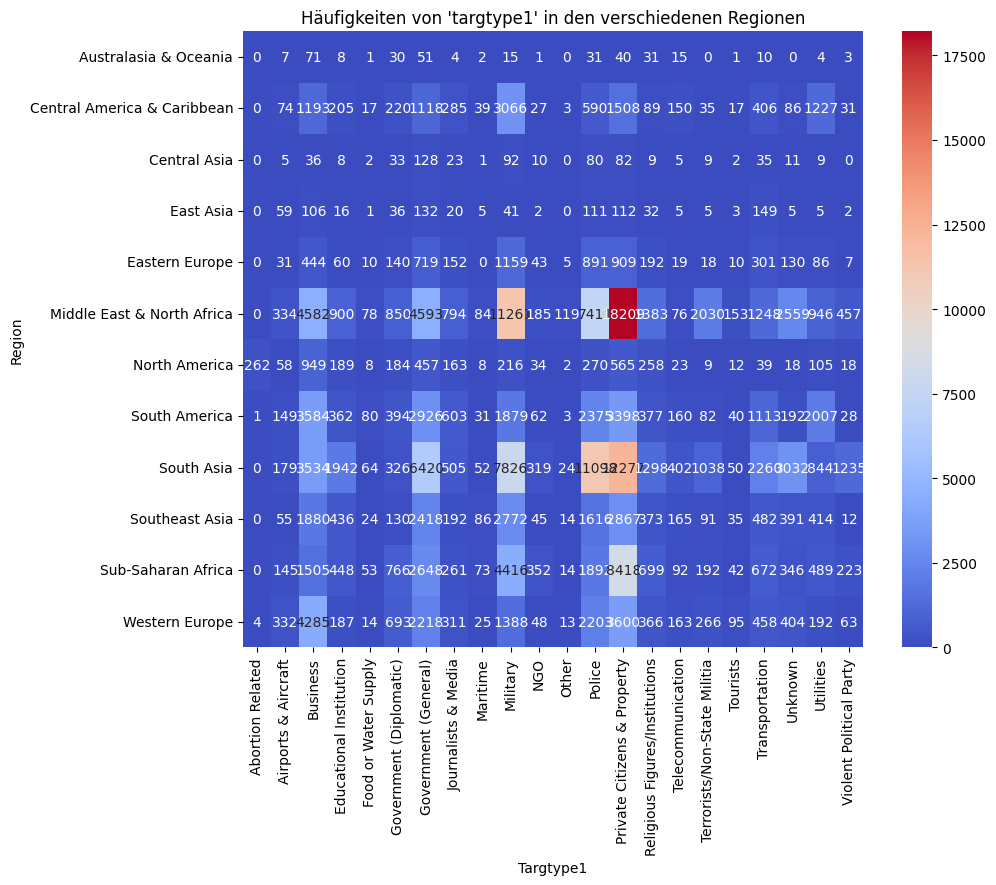

In [13]:
# Hypothesentests
# Die Zielgruppe ist unabhaengig von der Region
# Null Hypothese: Die Zielgruppe ist unabhaengig von der Region
# Alternative Hypothese: Die Zielgruppe ist abhaengig von der Region

from scipy.stats import chi2_contingency

# Kreuztabelle erstellen
cross_table = pd.crosstab(df['region_txt'], df['targtype1_txt'])

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(cross_table)

print('Chi-Quadrat-Statistik:', chi2)
print('p-Wert:', p)
print('Freiheitsgrade:', dof)
print('Erwartete Werte:', expected)

# Interpretation des p-Werts
if p < 0.05:
    print("Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'targtype1' und 'region' (H₀ ablehnen).")
else:
    print("Ergebnis: Kein signifikanter Zusammenhang zwischen 'targtype1' und 'region' (H₀ nicht ablehnen).")

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Häufigkeiten von 'targtype1' in den verschiedenen Regionen")
plt.xlabel("Targtype1")
plt.ylabel("Region")
plt.show()

Chi-Quadrat-Statistik: 130212.18234584822
p-Wert: 0.0
Freiheitsgrade: 4263
Erwartete Werte: [[2.40891534e+01 1.28836371e+02 2.00012150e+03 ... 6.47249387e+02
  5.70921957e+02 1.87570599e+02]
 [1.04403307e-01 5.58381734e-01 8.66860271e+00 ... 2.80520348e+00
  2.47439749e+00 8.12938113e-01]
 [3.50515007e+00 1.87466453e+01 2.91032479e+02 ... 9.41795752e+01
  8.30733694e+01 2.72929101e+01]
 ...
 [6.36605533e-02 3.40476667e-01 5.28573336e+00 ... 1.71048992e+00
  1.50877896e+00 4.95693972e-01]
 [7.89390861e-02 4.22191067e-01 6.55430937e+00 ... 2.12100751e+00
  1.87088591e+00 6.14660525e-01]
 [1.34960373e-01 7.21810535e-01 1.12057547e+01 ... 3.62623864e+00
  3.19861139e+00 1.05087122e+00]]
Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'targtype1' und 'country' (H₀ ablehnen).


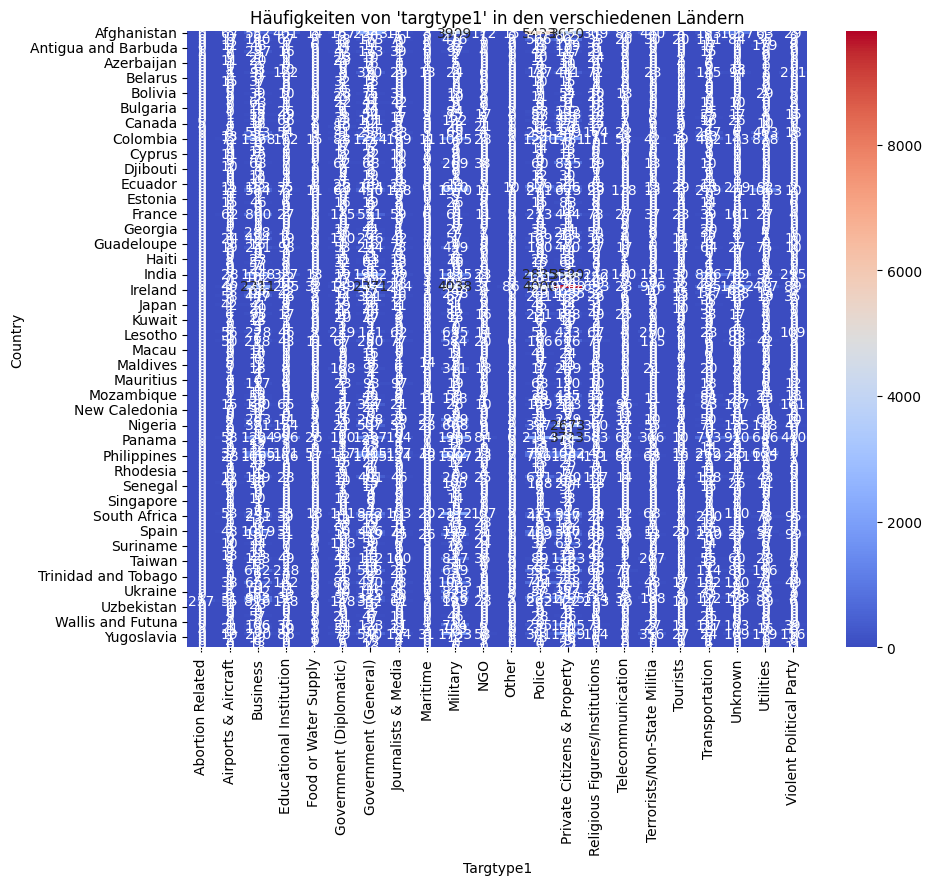

In [14]:
# Hypothesentests
# Die Zielgruppe ist unabhaengig vom Land
# Null Hypothese: Die Zielgruppe ist unabhaengig vom Land
# Alternative Hypothese: Die Zielgruppe ist abhaengig vom Land

# Kreuztabelle erstellen
cross_table = pd.crosstab(df['country_txt'], df['targtype1_txt'])

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(cross_table)

print('Chi-Quadrat-Statistik:', chi2)
print('p-Wert:', p)
print('Freiheitsgrade:', dof)
print('Erwartete Werte:', expected)

# Interpretation des p-Werts
if p < 0.05:
    print("Ergebnis: Es gibt einen signifikanten Zusammenhang zwischen 'targtype1' und 'country' (H₀ ablehnen).")
else:
    print("Ergebnis: Kein signifikanter Zusammenhang zwischen 'targtype1' und 'country' (H₀ nicht ablehnen).")

# Heatmap erstellen
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Häufigkeiten von 'targtype1' in den verschiedenen Ländern")
plt.xlabel("Targtype1")
plt.ylabel("Country")
plt.show()

## 3. Unifying & Transformation

### Datentypen anzeigen

Nun möchten wir prüfen welche Datentypen das DataFrame enthält.   
Dazu geben wir mit `.info()` die Datentypen aller Spalten aus.

In [15]:
# info über die Daten
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             209706 non-null  int64  
 1    iyear               209706 non-null  int64  
 2    imonth              209706 non-null  int64  
 3    iday                209706 non-null  int64  
 4    approxdate          12689 non-null   object 
 5    extended            209706 non-null  int64  
 6    resolution          4861 non-null    object 
 7    country             209706 non-null  int64  
 8    country_txt         209706 non-null  object 
 9    region              209706 non-null  int64  
 10   region_txt          209706 non-null  object 
 11   provstate           209706 non-null  object 
 12   city                209279 non-null  object 
 13   latitude            205015 non-null  float64
 14   longitude           205014 non-null  float64
 15   specificity    

Das DataFrame enthält insgesamt 209.706 Einträge und 135 Spalten. Die Spalten decken verschiedene Datentypen ab, darunter int64 (23 Spalten), float64 (54 Spalten), object (57 Spalten) und datetime64[ns] (1 Spalte). Die Daten beinhalten vollständig gefüllte Spalten wie eventid, iyear, imonth, iday, country, country_txt, region, region_txt, und weitere. Einige Spalten weisen jedoch zahlreiche fehlende Werte auf, beispielsweise approxdate (nur 12.689 Werte), resolution (4.861 Werte) oder related (30.604 Werte). Geografische Informationen wie latitude und longitude sind für etwa 205.000 Einträge vorhanden.

In [16]:
# iyear, imonth & iday analysieren, ob es ungültige Werte gibt
print(df['iyear'].unique())
print(df['imonth'].unique())
print(df['iday'].unique())

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020]
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]


In [17]:
# Zählen wie viele Zeilen bei imonth und iday den Wert 0 haben
print(df[df['imonth'] == 0].shape[0])
print(df[df['iday'] == 0].shape[0])

20
891


Da nur sehr wenige Zeilen ungültige Datumswerte aufweisen (z.B. 0, da das Datum nicht bekannt ist) werden diese entfernt.

In [18]:
# Zeilen mit ungültigen Werten löschen
df = df[(df['imonth'] != 0) & (df['iday'] != 0)]

In [19]:
# Spalte iyear, imonth, iday in ein String umwandeln und aneinanderhängen mit einem Bindestrich
df['date'] = df['iyear'].astype(str) + '-' + df['imonth'].astype(str) + '-' + df['iday'].astype(str)

# date in ein datetime umwandeln
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Spalten iyear, imonth, iday löschen
df = df.drop(['iyear', 'imonth', 'iday'], axis=1)

In [20]:
# Datum in Unix-timestamp umwandeln, sodass diese als Int dargestellt werden
df['date'] = df['date'].astype(np.int64) // 10**9

In [21]:
# Info über die Daten
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 208815 entries, 0 to 209705
Data columns (total 133 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             208815 non-null  int64  
 1    approxdate          12424 non-null   object 
 2    extended            208815 non-null  int64  
 3    resolution          4789 non-null    object 
 4    country             208815 non-null  int64  
 5    country_txt         208815 non-null  object 
 6    region              208815 non-null  int64  
 7    region_txt          208815 non-null  object 
 8    provstate           208815 non-null  object 
 9    city                208391 non-null  object 
 10   latitude            204211 non-null  float64
 11   longitude           204210 non-null  float64
 12   specificity         208814 non-null  float64
 13   vicinity            208815 non-null  int64  
 14   location            67280 non-null   object 
 15   summary             

## 4. Data Cleansing

In [22]:
# Zählen wie viele Null Werte in den Spalten vorhanden sind (alle anzeigen lassen)
pd.set_option('display.max_rows', None) 
print(df.isnull().sum())

eventid                    0
approxdate            196391
extended                   0
resolution            204026
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                     424
latitude                4604
longitude               4605
specificity                1
vicinity                   0
location              141535
summary                65519
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           173673
alternative_txt       173673
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           200419
attacktype2_txt       200419
attacktype3           208158
attacktype3_txt       208158
targtype1                  0
targtype1_txt              0
targsubtype1           11777
targsubtype1_t

In [23]:
# Anzahl Zeilen mit Zweifel ob Terroranschlag (doubtterr = 1) anzeigen
print(df[df['doubtterr'] == 1].shape[0])

35128


In [24]:
# Zeilen mit Zweifel ob Terroranschlag (doubtterr = 1) löschen und ein neues DataFrame erstellen
df_cleaned = df[df['doubtterr'] == 0]

# Zeile doubtterr löschen
df_cleaned = df_cleaned.drop('doubtterr', axis=1)

Der Datensatz wird weiter verkleinert, indem nur relevante Spalten behalten werden, welche wichtige Informationen für die Vorhersage des Risikos oder der Klassifizierung von Terroranschlägen enthalten.

In [25]:
# Liste der zu behaltenden Spalten
columns_to_keep = [
    'date', 'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1_txt', 'success', 'suicide', 'targtype1_txt', 'natlty1_txt', 
    'nkill', 'nwound', 'property', 'gname', 'weaptype1_txt', 'multiple', 'crit1', 'crit2', 'crit3', 'individual', 'city', 'location'
]

# Auswahl der Spalten aus dem DataFrame
df_reduced = df_cleaned[columns_to_keep]

# Optional: Daten anzeigen
print(df_reduced.head())

       date         country_txt                   region_txt   latitude  \
0  15724800  Dominican Republic  Central America & Caribbean  18.456792   
5         0       United States                North America  37.005105   
6     86400             Uruguay                South America -34.891151   
8     86400       United States                North America  43.076592   
9    172800       United States                North America  43.072950   

   longitude                 attacktype1_txt  success  suicide  \
0 -69.951164                   Assassination        1        0   
5 -89.176269                   Armed Assault        1        0   
6 -56.187214                   Assassination        0        0   
8 -89.412488  Facility/Infrastructure Attack        1        0   
9 -89.386694  Facility/Infrastructure Attack        1        0   

                 targtype1_txt         natlty1_txt  ...  property  \
0  Private Citizens & Property  Dominican Republic  ...         0   
5             

In [26]:
# Info über die Daten
df_reduced.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 160043 entries, 0 to 209704
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             160043 non-null  int64  
 1   country_txt      160043 non-null  object 
 2   region_txt       160043 non-null  object 
 3   latitude         157113 non-null  float64
 4   longitude        157113 non-null  float64
 5   attacktype1_txt  160043 non-null  object 
 6   success          160043 non-null  int64  
 7   suicide          160043 non-null  int64  
 8   targtype1_txt    160043 non-null  object 
 9   natlty1_txt      158278 non-null  object 
 10  nkill            151871 non-null  float64
 11  nwound           146690 non-null  float64
 12  property         160043 non-null  int64  
 13  gname            160043 non-null  object 
 14  weaptype1_txt    160043 non-null  object 
 15  multiple         160042 non-null  float64
 16  crit1            160043 non-null  int64  
 

Nun beschäftigen wir uns mit den Null-Werten: Entweder entfernen wir diese oder sie werden Imputation aufgefüllt.

In [27]:
# Anzahl der Null-Werte in jeder Spalte
null_counts = df_reduced.isnull().sum()

# Prozentsatz der Null-Werte in jeder Spalte
null_percentage = (df_reduced.isnull().mean() * 100)

# Zeigt beides in einem DataFrame an
missing_data = pd.DataFrame({'Null-Werte': null_counts, 'Prozent': null_percentage})

# Zeige die ersten Zeilen des Ergebnisses an
print(missing_data)

                 Null-Werte    Prozent
date                      0   0.000000
country_txt               0   0.000000
region_txt                0   0.000000
latitude               2930   1.830758
longitude              2930   1.830758
attacktype1_txt           0   0.000000
success                   0   0.000000
suicide                   0   0.000000
targtype1_txt             0   0.000000
natlty1_txt            1765   1.102829
nkill                  8172   5.106128
nwound                13353   8.343383
property                  0   0.000000
gname                     0   0.000000
weaptype1_txt             0   0.000000
multiple                  1   0.000625
crit1                     0   0.000000
crit2                     0   0.000000
crit3                     0   0.000000
individual                0   0.000000
city                    384   0.239936
location             102693  64.165880


Ein gängiger Ansatz bei der Handhabung von Null-Werten ist es, Zeilen oder Spalten zu entfernen, die einen hohen Anteil an fehlenden Daten enthalten. Wir nehmen > 50%. 

In [28]:
# Entfernt Spalten mit mehr als 50% Null-Werten
df_cleaned_columns = df_reduced.dropna(thresh=df_reduced.shape[0] * 0.5, axis=1)

Bei den restlichen Spalten werden die fehlenden Werte wo sinnvoll durch Imputation aufgefüllt oder ebenfalls entfernt.

Imputation von fehlenden Werten (unter Verwendung des Medians, da dieser weniger empfindlich gegenüber Ausreissern ist):<br>
-"nkill": Anzahl Todesopfer<br>
-"nwound": Anzahl Verletzte<br>

Andere Vorgehensweise:<br>
-"latitude" & "longitude": da sich die Imputation über einen API basierend auf der angegebenen Stadt (Spalte "city") als schwierig herausgestellt hat, wird auf eine Imputation verzichtet und die Zeilen werden entfernt (verschiedene Schreibweisen der Städtenamen erschweren eine Imputation)
-"natlty1_txt": ist die Nationalität der Zielperson, diese Werte können wir ebenfalls nicht ergänzen - Zeilen mit Null-Werten werden entfernt<br>
-"multiple": bloss 1 Null-Wert, Zeile wird entfernt <br>
-"city": sehr wenige Null-Werte und unsinnig einfach eine zufällige Stadt in dem betroffenen Land auszuwählen - Zeilen mit Null-Werten werden entfernt<br>

In [29]:
# Imputation der fehlenden Werte in numerischen Spalten mit dem Median
df_cleaned_columns['nkill'] = df_cleaned_columns['nkill'].fillna(df_cleaned_columns['nkill'].median())
df_cleaned_columns['nwound'] = df_cleaned_columns['nwound'].fillna(df_cleaned_columns['nwound'].median())

# Entfernen der Zeilen, in denne die Spalten 'latitude' und 'longitude' Null-Werte enthalten
df_cleaned_columns = df_cleaned_columns.dropna(subset=['latitude', 'longitude'])

# Entfernen der Zeilen, in denen die Spalte 'natlty1_txt' Null-Werte enthält
df_cleaned_columns = df_cleaned_columns.dropna(subset=['natlty1_txt'])

# Entfernen der Zeile, in der 'multiple' Null-Werte enthält (nur 1 Null-Wert)
df_cleaned_columns = df_cleaned_columns.dropna(subset=['multiple'])

# Entfernen der Zeilen, in denen 'city' Null-Werte enthält
# Hier gehen wir davon aus, dass es im Datensatz keine logische oder konkrete Möglichkeit gibt, die fehlenden Städte zu ergänzen.
df_cleaned_columns = df_cleaned_columns.dropna(subset=['city'])

/tmp/ipykernel_39154/2839722261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_columns['nkill'] = df_cleaned_columns['nkill'].fillna(df_cleaned_columns['nkill'].median())
/tmp/ipykernel_39154/2839722261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_columns['nwound'] = df_cleaned_columns['nwound'].fillna(df_cleaned_columns['nwound'].median())


In [31]:
# Kopie von df_cleaned_columns erstellen
df_final = df_cleaned_columns.copy()
df_final.to_csv("data/df_final.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_final = pd.read_csv("data/df_final.csv")

## 5. Analysis & Validation

Wir möchten uns nun einen genaueren Überblick über die Werte verschaffen.   
Dazu nutzen wird die Funktion `.describe()`.

In [33]:
# Statistische Zusammenfassung
df_final.describe()

,date,latitude,longitude,success,suicide,nkill,nwound,property,multiple,crit1,crit2,crit3,individual
count,1.550090e+05,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000,155009.000000
mean,1.157550e+09,23.592943,32.480734,0.881755,0.037256,2.123644,3.170332,-0.786780,0.160952,0.999929,0.999968,0.999903,0.004129
std,4.076175e+08,17.967658,54.550779,0.322899,0.189389,10.392104,45.017507,3.370141,0.367488,0.008424,0.005679,0.009837,0.064123
min,0.000000e+00,-53.154613,-158.081142,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.491392e+08,11.744640,10.291712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.347840e+09,31.505470,44.148235,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.456013e+09,34.516895,69.147014,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.609373e+09,74.633553,179.366667,1.000000,1.000000,1385.000000,10878.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Durchschnittswerte (Mean):<br>
Die Mittelwerte zeigen eine unterschiedliche Verteilung der Daten:<br>
-date: Der Mittelwert liegt bei etwa 1.16 Milliarden, was auf das Jahr 2004 hindeutet, unter Berücksichtigung des Datumsformats (Unix-Zeitstempel).<br>
-latitude und longitude: Die durchschnittlichen geographischen Koordinaten liegen bei 23.59 und 32.48. Dies deutet auf eine große geografische Verteilung der Vorfälle hin, wobei die meisten Ereignisse aus wärmeren und tropischen Regionen stammen.<br>
-success: Der Mittelwert von 0.88 zeigt, dass ein Großteil der Anschläge erfolgreich war.<br>
-suicide: Mit einem Mittelwert von 0.037 lässt sich feststellen, dass nur ein kleiner Teil der Ereignisse Selbstmordanschläge waren.<br>
-nkill: Der Mittelwert von 2.12 zeigt, dass die meisten Anschläge nur wenige Todesopfer verursachten, jedoch gibt es auch Fälle mit sehr vielen Toten.<br>
-nwound: Der Mittelwert von 3.17 deutet darauf hin, dass viele Anschläge auch eine relativ niedrige Zahl an Verwundeten zur Folge hatten.<br>
-property: Der Mittelwert von -0.79 könnte auf Fehler in den Daten oder auf eine falsche Kodierung für den Eigenschaden hindeuten.<br>
-multiple: Der Mittelwert von 0.16 zeigt, dass nur eine kleine Anzahl von Vorfällen mehr als ein Angriff umfasst hat.<br>
-crit1, crit2, crit3: Diese Werte sind fast konstant bei 1 und deuten darauf hin, dass die meisten Ereignisse als besonders schwerwiegende Anschläge eingestuft wurden.<br>
<br>
Streuung (Standardabweichung):<br>
Die Standardabweichungen zeigen, dass es erhebliche Schwankungen in den Daten gibt:<br>
-latitude und longitude: Hohe Standardabweichungen von 17.97 bzw. 54.55 weisen auf eine breite geographische Streuung der Ereignisse hin.<br>
-success und suicide: Relativ geringe Standardabweichungen (ca. 0.32 und 0.19) deuten darauf hin, dass diese Variablen größtenteils konstant sind.<br>
-nkill und nwound: Hohe Standardabweichungen von 10.39 und 45.02 spiegeln die große Varianz der Opferzahlen wider, mit einigen Ereignissen, bei denen viele Menschen getötet oder verletzt wurden.<br>
-property: Eine Standardabweichung von 3.37 zeigt die hohe Varianz im Wert des verursachten Eigentumsschadens, der von sehr niedrigen bis zu extrem hohen Werten reicht.<br>
<br>
Minimale und maximale Werte:<br>
Die Minimal- und Maximalwerte verdeutlichen die Extremwerte im Datensatz:<br>
-nkill reicht von 0 bis zu extremen 1385, was auf seltene, aber sehr tödliche Anschläge hinweist.<br>
-nwound variiert von 0 bis 10.878, was die weite Spannbreite von weniger bis hin zu vielen Verwundeten zeigt.<br>
<br>
Perzentile (25%, 50%, 75%):<br>
Die Verteilung der Werte zeigt:<br>
-Bei nkill und nwound sind 25% der Werte 0, was darauf hinweist, dass viele Anschläge keine Todesopfer oder keine Verwundeten zur Folge hatten.<br>
-Der Median (50%-Perzentil) von nkill und nwound liegt ebenfalls bei 0, was zeigt, dass die Mehrheit der Anschläge relativ wenig Opfer forderte.<br>
-Bei property liegt das 75%-Perzentil bei 1.0, was darauf hindeutet, dass der Eigenschaden in vielen Fällen gering oder nicht dokumentiert war.<br>

In [34]:
# Statistische Zusammenfassung für kategorische Spalten
df_final.describe(include='object')

,country_txt,region_txt,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,city
count,155009,155009,155009,155009,155009,155009,155009,155009
unique,200,12,9,22,207,3206,12,35555
top,Iraq,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Iraq,Unknown,Explosives,Baghdad
freq,23751,44145,78989,44273,23402,67125,83083,7610


Zusammenfassung:<br>
Der Datensatz zeigt eine starke Konzentration von Vorfällen im Irak und in der Region Middle East & North Africa.<br>
Bomben und Explosionen sind die vorherrschende Art von Angriffen, und private Bürger und deren Eigentum sind die häufigsten Ziele.<br>
Eine große Anzahl von Vorfällen ist der unbekannten Tätergruppe zugeordnet, und Explosives sind die am häufigsten verwendeten Waffen.<br>
Die Städte Baghdad und Iraq zeigen eine auffällige Häufung von terroristischen Vorfällen.

## 6. Feature Selection & Engineering

In [35]:
# Codierung kategorischer Spalten 
from sklearn.preprocessing import LabelEncoder

# Neues DataFrame erstellen, welches codierte Spalten enthält
df_final_encoded = df_final.copy()

# Initialisierung des LabelEncoders
label_encoder = LabelEncoder()

# Codierung der Spalten 'country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'city'
df_final_encoded['country_txt'] = label_encoder.fit_transform(df_final_encoded['country_txt'])
df_final_encoded['region_txt'] = label_encoder.fit_transform(df_final_encoded['region_txt'])
df_final_encoded['attacktype1_txt'] = label_encoder.fit_transform(df_final_encoded['attacktype1_txt'])
df_final_encoded['targtype1_txt'] = label_encoder.fit_transform(df_final_encoded['targtype1_txt'])
df_final_encoded['natlty1_txt'] = label_encoder.fit_transform(df_final_encoded['natlty1_txt'])
df_final_encoded['gname'] = label_encoder.fit_transform(df_final_encoded['gname'])
df_final_encoded['weaptype1_txt'] = label_encoder.fit_transform(df_final_encoded['weaptype1_txt'])
df_final_encoded['city'] = label_encoder.fit_transform(df_final_encoded['city'])

# Info über die Daten
df_final_encoded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155009 entries, 0 to 155008
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             155009 non-null  int64  
 1   country_txt      155009 non-null  int64  
 2   region_txt       155009 non-null  int64  
 3   latitude         155009 non-null  float64
 4   longitude        155009 non-null  float64
 5   attacktype1_txt  155009 non-null  int64  
 6   success          155009 non-null  int64  
 7   suicide          155009 non-null  int64  
 8   targtype1_txt    155009 non-null  int64  
 9   natlty1_txt      155009 non-null  int64  
 10  nkill            155009 non-null  float64
 11  nwound           155009 non-null  float64
 12  property         155009 non-null  int64  
 13  gname            155009 non-null  int64  
 14  weaptype1_txt    155009 non-null  int64  
 15  multiple         155009 non-null  float64
 16  crit1            155009 non-null  int6

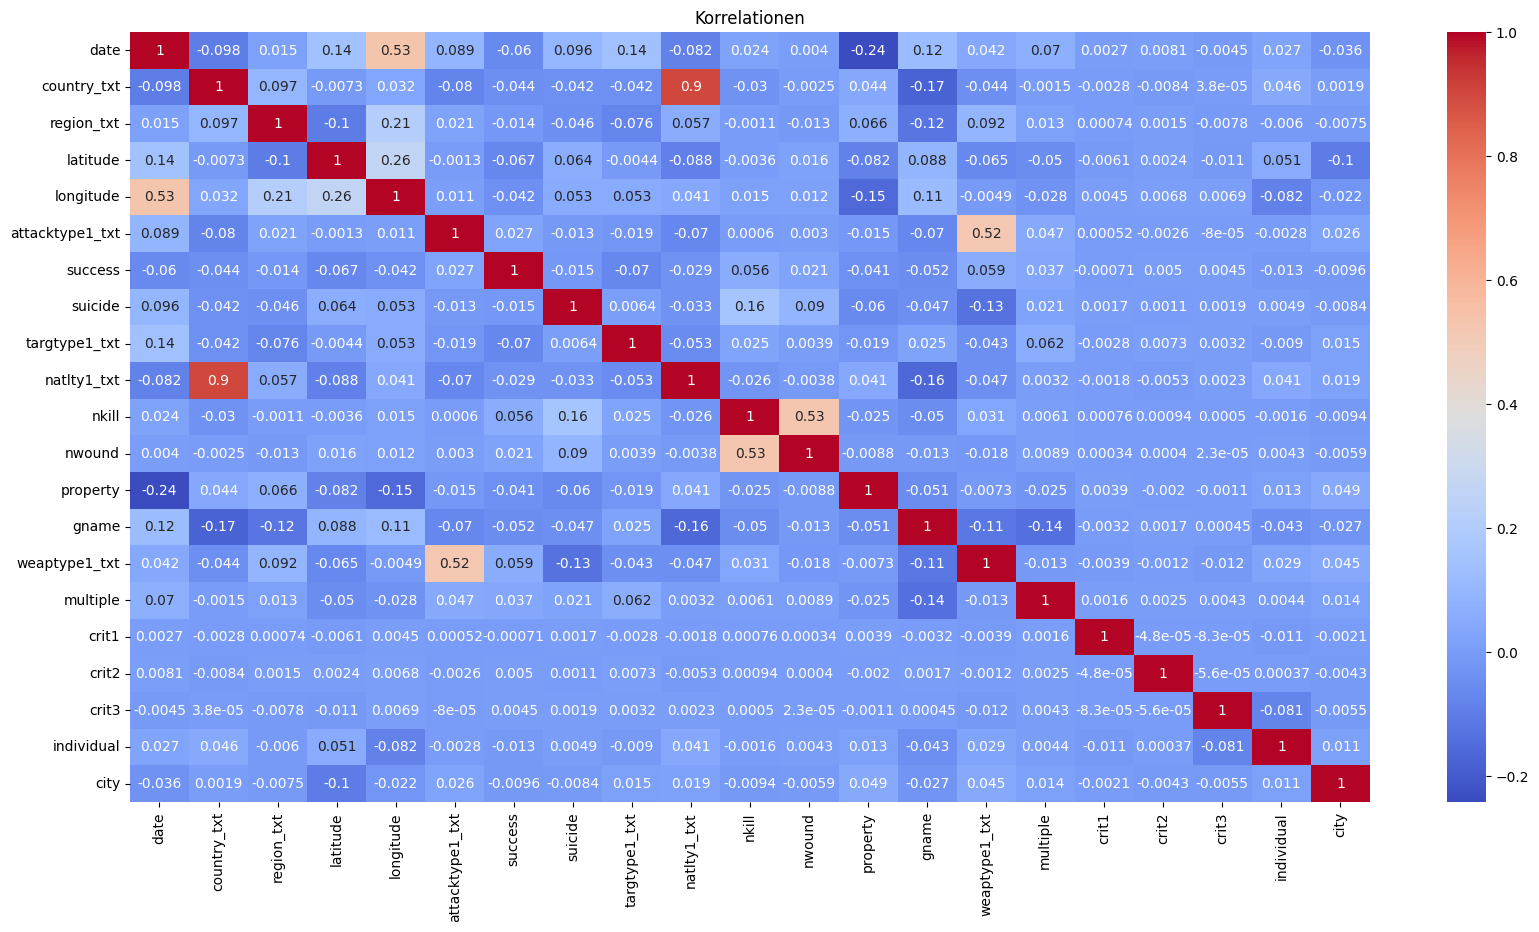

In [36]:
# Analyse der Korrelationen
correlation_matrix = df_final_encoded.corr()

# Heatmap der Korrelationen
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationen')
plt.show()

Identifikation der Features:

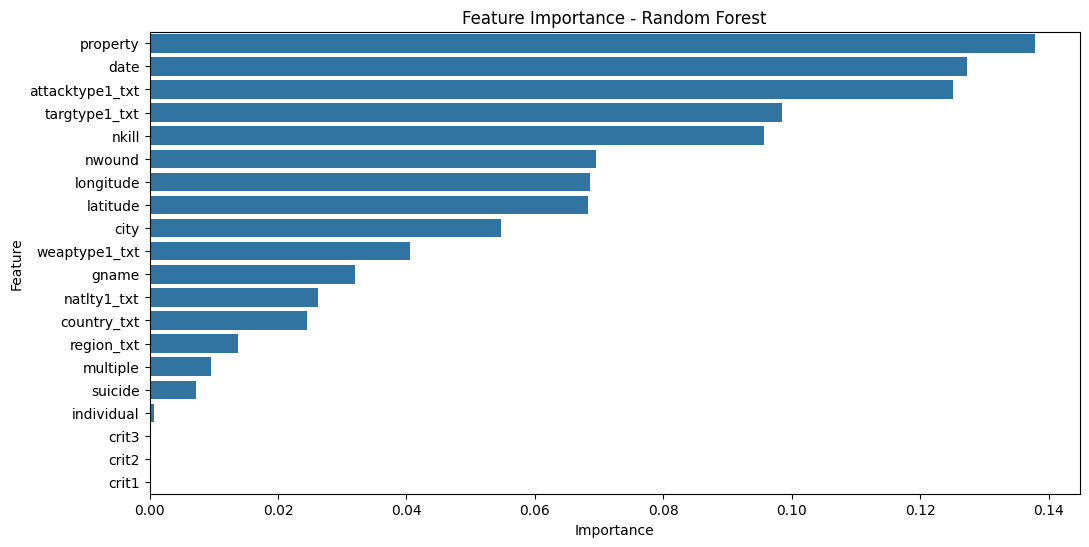

In [37]:
# Identifikation der Features
from sklearn.ensemble import RandomForestClassifier

# Zielvariable (ob der Angriff erfolgreich war)
X = df_final_encoded.drop(columns=['success'])
y = df_final_encoded['success']

# Random Forest Modell
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Wichtigkeit der Features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisierung der Feature-Wichtigkeit
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()


Es gibt einige Features, die eine Importance > 0.05 aufweisen. Dies deutet daraufhin, dass diese Faktoren als nützlich angesehen werden könne in Bezug auf die Vorhersage ob ein Terrorangriff erfolgreich sein wird oder nicht.

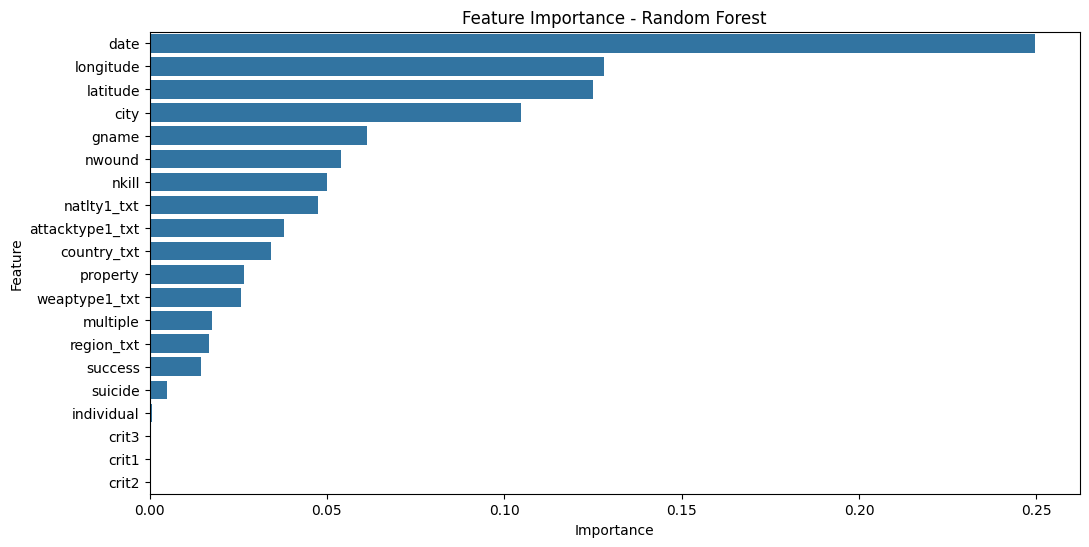

In [38]:
# Identifikation der Features
# Zielvariable (Zielgruppe)
X = df_final_encoded.drop(columns=['targtype1_txt'])
y = df_final_encoded['targtype1_txt']

# Random Forest Modell
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Wichtigkeit der Features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisierung der Feature-Wichtigkeit
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()


Bei der Zielvariable "Zielperson" weisen ebenfalls einige Features eine Importance von >0.05 auf. Spannenderweise vorne an das Feature "date" mit einer Importance von 0.25. Dies könnte für unseren Use Case interessant sein.

Optimierung der Datengrundlage:

Demografische Daten: Informationen zu Bevölkerungsdichte, BIP pro Kopf oder politische Stabilität in den betroffenen Ländern könnten nützlich sein.<br>
Wirtschaftliche Daten: Das Hinzufügen von wirtschaftlichen Indikatoren könnte aufzeigen, ob finanzielle Instabilität ein zusätzlicher Faktor für Terrorismus ist.

## 7. Anwendung in Machine Learning

Model: Random Forest
Accuracy: 0.5135797690471583
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.38      0.19      0.26       218
           2       0.47      0.42      0.45      3395
           3       0.35      0.25      0.30       824
           4       0.32      0.13      0.18        63
           5       0.66      0.50      0.57       656
           6       0.46      0.46      0.46      4364
           7       0.33      0.19      0.24       575
           8       0.73      0.17      0.28        63
           9       0.43      0.23      0.30      1071
          10       0.48      0.17      0.25       198
          11       0.47      0.18      0.26        39
          12       0.50      0.57      0.53      5006
          13       0.55      0.70      0.62      8943
          14       0.37      0.20      0.26       935
          15       0.57      0.40      0.47       255
       

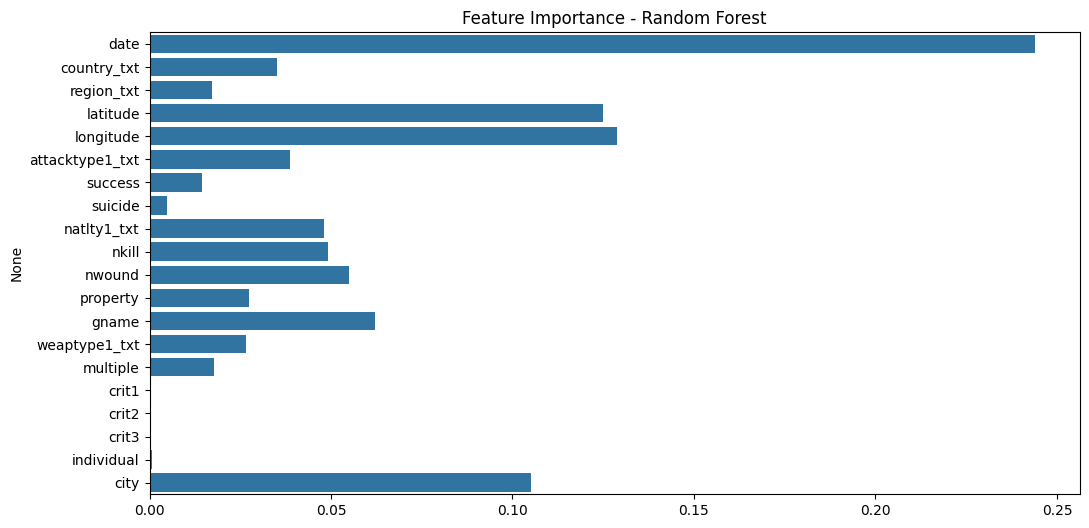

Model: XGBoost
Accuracy: 0.5064189407135024
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.47      0.22      0.30       218
           2       0.45      0.40      0.42      3395
           3       0.46      0.24      0.31       824
           4       0.62      0.08      0.14        63
           5       0.61      0.61      0.61       656
           6       0.45      0.45      0.45      4364
           7       0.47      0.13      0.20       575
           8       0.65      0.17      0.28        63
           9       0.53      0.17      0.26      1071
          10       0.54      0.17      0.25       198
          11       0.82      0.23      0.36        39
          12       0.48      0.54      0.51      5006
          13       0.53      0.72      0.61      8943
          14       0.49      0.14      0.22       935
          15       0.71      0.32      0.44       255
          16 

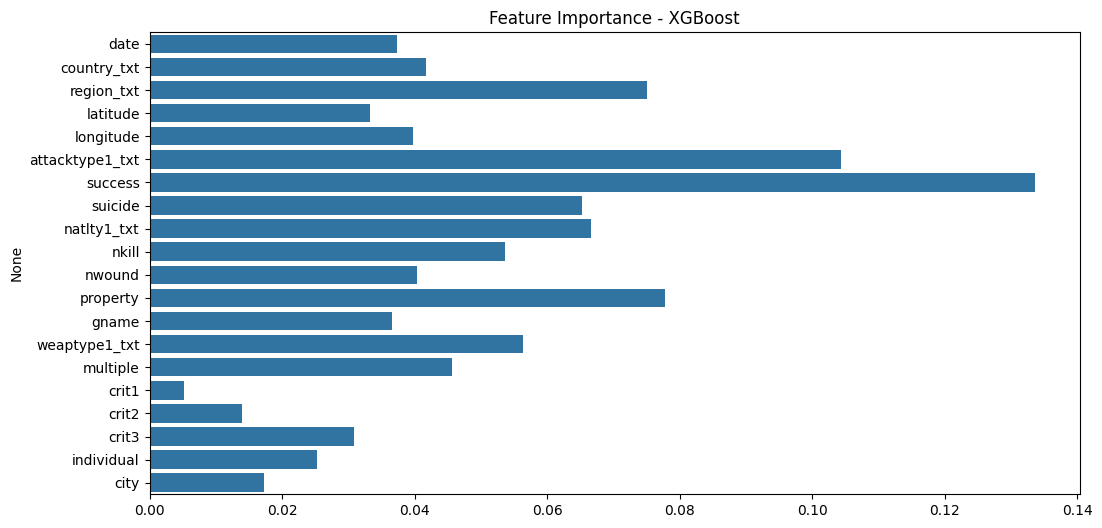

Model: Logistic Regression
Accuracy: 0.2903038513644281
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00       218
           2       0.23      0.03      0.06      3395
           3       0.00      0.00      0.00       824
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00       656
           6       0.16      0.06      0.09      4364
           7       0.00      0.00      0.00       575
           8       0.00      0.00      0.00        63
           9       0.00      0.00      0.00      1071
          10       0.00      0.00      0.00       198
          11       0.00      0.00      0.00        39
          12       0.00      0.00      0.00      5006
          13       0.30      0.96      0.46      8943
          14       0.00      0.00      0.00       935
          15       0.00      0.00      0.00       255
 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and be

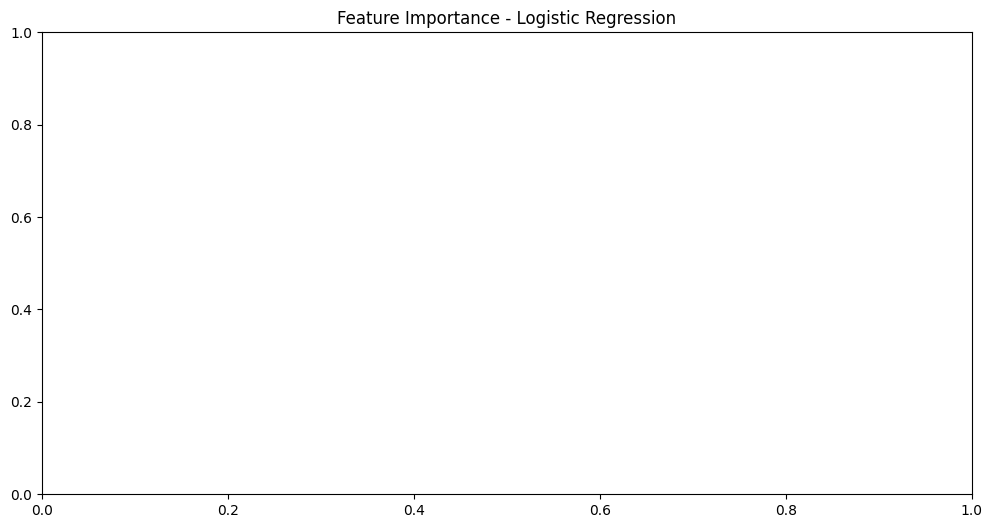

In [4]:
# Importieren der benötigten Bibliotheken
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# LabelEncoder für Zielvariable (targtype1_txt)
label_encoder = LabelEncoder()
df_final['targtype1_txt_encoded'] = label_encoder.fit_transform(df_final['targtype1_txt'])

# Kategorische Spalten (außer der Zielvariable) für Features codieren
categorical_columns = ['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'city']
for col in categorical_columns:
    df_final[col] = label_encoder.fit_transform(df_final[col])

# Features und Zielvariable definieren
X = df_final.drop(columns=['targtype1_txt', 'targtype1_txt_encoded'])
y = df_final['targtype1_txt_encoded']

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klassifikationsmodelle initialisieren
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Modelle trainieren und auswerten
results = {}
for model_name, model in models.items():
    # Trainieren des Modells
    model.fit(X_train, y_train)
    
    # Vorhersagen auf den Testdaten
    y_pred = model.predict(X_test)
    
    # Berechnung der Performance-Metriken
    accuracy = accuracy_score(y_test, y_pred)
    
    # Zurückübersetzen der numerischen Vorhersagen und Testdaten in Originalklassen
    y_test_original = label_encoder.inverse_transform(y_test)
    y_pred_original = label_encoder.inverse_transform(y_pred)
    
    # Erstellen des Classification Reports und der Confusion Matrix
    report = classification_report(y_test_original, y_pred_original)
    cm = confusion_matrix(y_test_original, y_pred_original)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": cm
    }
    
    # Performance vergleichen
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n {report}")
    
    try:
        plt.figure(figsize=(12, 6))
        plt.title(f"Feature Importance - {model_name}")
        # Feature Importance
        importance = model.feature_importances_
        sns.barplot(x=importance, y=X.columns)
        # Plot Feature Importance
        plt.show()
    except Exception as e:
        print(f"an error occured for {model_name}")
        e

## 8. Anwendung von XAI - Techniken

## 9. Fazit

## 10. Quellenverzeichnis

START (National Consortium for the Study of Terrorism and Responses to Terrorism) (2022). *Global Terrorism Database 1970 - 2020 [Data set].* https://www.start.umd.edu/gtd

